# Web Scraping Lab

You will find in this notebook some scrapy exercises to practise your scraping skills.

**Tips:**

- Check the response status code for each request to ensure you have obtained the intended contennt.
- Print the response text in each request to understand the kind of info you are getting and its format.
- Check for patterns in the response text to extract the data/info requested in each question.
- Visit each url and take a look at its source through Chrome DevTools. You'll need to identify the html tags, special class names etc. used for the html content you are expected to extract.

- [Requests library](http://docs.python-requests.org/en/master/#the-user-guide) documentation 
- [Beautiful Soup Doc](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
- [Urllib](https://docs.python.org/3/library/urllib.html#module-urllib)
- [re lib](https://docs.python.org/3/library/re.html)
- [lxml lib](https://lxml.de/)
- [Scrapy](https://scrapy.org/)
- [List of HTTP status codes](https://en.wikipedia.org/wiki/List_of_HTTP_status_codes)
- [HTML basics](http://www.simplehtmlguide.com/cheatsheet.php)
- [CSS basics](https://www.cssbasics.com/#page_start)

#### Below are the libraries and modules you may need. `requests`,  `BeautifulSoup` and `pandas` are imported for you. If you prefer to use additional libraries feel free to uncomment them.

In [36]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from pprint import pprint
from lxml import html
from lxml.html import fromstring
import urllib.request
from urllib.request import urlopen
import random
import re
import scrapy

#### Download, parse (using BeautifulSoup), and print the content from the Trending Developers page from GitHub:

In [2]:
# This is the url you will scrape in this exercise
url = 'https://github.com/trending/developers'

In [3]:
#your code

html = requests.get(url).text
soup = BeautifulSoup(html, 'html.parser')

In [4]:
print(soup)


<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<link href="https://github.githubassets.com" rel="dns-prefetch"/>
<link href="https://avatars.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://github-cloud.s3.amazonaws.com" rel="dns-prefetch"/>
<link href="https://user-images.githubusercontent.com/" rel="dns-prefetch"/>
<link crossorigin="anonymous" href="https://github.githubassets.com/assets/frameworks-eca8e21af2622cbcba2c93c67f79baed.css" integrity="sha512-7KjiGvJiLLy6LJPGf3m67ejAdgQsgDdnxZYoaI6+Agd0ZxHKTCjoKZgaf3PgUjURCcVceAwySJJJWgitRskDiA==" media="all" rel="stylesheet">
<link crossorigin="anonymous" href="https://github.githubassets.com/assets/site-8da471024fd1ec4aba5d7b71b7675661.css" integrity="sha512-jaRxAk/R7Eq6XXtxt2dWYc6UfgT/Jk9zYWYh4UpAt5LFRnYVaWqEM3sPhUFL3fOBmHhHoOcn4wfLkMS21Q1yaw==" media="all" rel="stylesheet">
<link crossorigin="anonymous" href="https://github.githubassets.com/assets/behaviors-a2972be4ce3824275509c57af2e5c6c8.css" integr

#### Display the names of the trending developers retrieved in the previous step.

Your output should be a Python list of developer names. Each name should not contain any html tag.

**Instructions:**

1. Find out the html tag and class names used for the developer names. You can achieve this using Chrome DevTools.

1. Use BeautifulSoup to extract all the html elements that contain the developer names.

1. Use string manipulation techniques to replace whitespaces and linebreaks (i.e. `\n`) in the *text* of each html element. Use a list to store the clean names.

1. Print the list of names.

Your output should look like below:

```
['trimstray (@trimstray)',
 'joewalnes (JoeWalnes)',
 'charlax (Charles-AxelDein)',
 'ForrestKnight (ForrestKnight)',
 'revery-ui (revery-ui)',
 'alibaba (Alibaba)',
 'Microsoft (Microsoft)',
 'github (GitHub)',
 'facebook (Facebook)',
 'boazsegev (Bo)',
 'google (Google)',
 'cloudfetch',
 'sindresorhus (SindreSorhus)',
 'tensorflow',
 'apache (TheApacheSoftwareFoundation)',
 'DevonCrawford (DevonCrawford)',
 'ARMmbed (ArmMbed)',
 'vuejs (vuejs)',
 'fastai (fast.ai)',
 'QiShaoXuan (Qi)',
 'joelparkerhenderson (JoelParkerHenderson)',
 'torvalds (LinusTorvalds)',
 'CyC2018',
 'komeiji-satori (神楽坂覚々)',
 'script-8']
 ```

In [5]:
#your code

name = soup.find_all(class_="col-sm-8 d-md-flex")[0]
name_list = list(name.stripped_strings)
name_list

['Ariel Mashraki',
 'a8m',
 'Popular repo',
 'golang-cheat-sheet',
 'An overview of Go syntax and features.']

In [6]:
txt = "The rain in Spain"
x = re.findall("Portugal", txt)

In [7]:
git_list = []

for i in range(25):
    name = soup.find_all(class_="col-sm-8 d-md-flex")[i]
    name_list = list(name.stripped_strings)
    new_name = name_list[0] + " " + "(" + name_list[1] + ")"
    git_list.append(new_name)

In [8]:
git_list 

#Nota: esta función NO devuelve los valores correctos cuando el nombre del developer y su handle son exactamente iguales, 
#ya que el código HTML se salta un elemento.

['Ariel Mashraki (a8m)',
 'Marc Rousavy (mrousavy)',
 'Felix Angelov (felangel)',
 'Jesse Duffield (jesseduffield)',
 'Rich Harris (Rich-Harris)',
 'Jonny Burger (JonnyBurger)',
 'Sylvain Gugger (sgugger)',
 'Franck Nijhof (frenck)',
 'Adam Johnson (adamchainz)',
 'Stephen Roller (stephenroller)',
 'Michael[tm] Smith (sideshowbarker)',
 'Kian Paimani (kianenigma)',
 'Markus Reiter (reitermarkus)',
 'andig (andig)',
 'Ed Welch (slim-bean)',
 'Adrian Wälchli (awaelchli)',
 'Daishi Kato (dai-shi)',
 'PySimpleGUI (PySimpleGUI)',
 'Mark Erikson (markerikson)',
 'Carlos Cuesta (carloscuesta)',
 'Torkel Ödegaard (torkelo)',
 'Robert Mosolgo (rmosolgo)',
 'Tom Payne (twpayne)',
 'Ryan Chandler (ryangjchandler)',
 'Olivier Poitrey (rs)']

#### Display the trending Python repositories in GitHub

The steps to solve this problem is similar to the previous one except that you need to find out the repository names instead of developer names.

In [9]:
# This is the url you will scrape in this exercise
url = 'https://github.com/trending'

In [10]:
html2 = requests.get('https://github.com/trending').text
soup = BeautifulSoup(html2, 'html.parser')

print(soup)


<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<link href="https://github.githubassets.com" rel="dns-prefetch"/>
<link href="https://avatars.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://github-cloud.s3.amazonaws.com" rel="dns-prefetch"/>
<link href="https://user-images.githubusercontent.com/" rel="dns-prefetch"/>
<link crossorigin="anonymous" href="https://github.githubassets.com/assets/frameworks-eca8e21af2622cbcba2c93c67f79baed.css" integrity="sha512-7KjiGvJiLLy6LJPGf3m67ejAdgQsgDdnxZYoaI6+Agd0ZxHKTCjoKZgaf3PgUjURCcVceAwySJJJWgitRskDiA==" media="all" rel="stylesheet">
<link crossorigin="anonymous" href="https://github.githubassets.com/assets/site-8da471024fd1ec4aba5d7b71b7675661.css" integrity="sha512-jaRxAk/R7Eq6XXtxt2dWYc6UfgT/Jk9zYWYh4UpAt5LFRnYVaWqEM3sPhUFL3fOBmHhHoOcn4wfLkMS21Q1yaw==" media="all" rel="stylesheet">
<link crossorigin="anonymous" href="https://github.githubassets.com/assets/behaviors-a2972be4ce3824275509c57af2e5c6c8.css" integr

In [11]:
repo = soup.find_all(class_="h3 lh-condensed")[24]
repo_list = list(repo.stripped_strings)
repo_list

['onnx /', 'onnx']

In [12]:
git_repos = []

for i in range(24):
    repo = soup.find_all(class_="h3 lh-condensed")[i]
    repo_list = list(repo.stripped_strings)
    new_repo = repo_list[0].replace(' /', '') + " " + "(" + repo_list[1] + ")"
    git_repos.append(new_repo)

In [13]:
git_repos

['CyberPunkMetalHead (Binance-News-Sentiment-Bot)',
 'testerSunshine (12306)',
 'dogecoin (dogecoin)',
 'sharkdp (bat)',
 'scottbez1 (splitflap)',
 'chefyuan (algorithm-base)',
 'Chia-Network (chia-blockchain)',
 'Rog3rSm1th (Profil3r)',
 'Chia-Network (chia-blockchain-gui)',
 'Netflix (consoleme)',
 '30-seconds (30-seconds-of-code)',
 'github (docs)',
 'recastnavigation (recastnavigation)',
 'SerenityOS (serenity)',
 'ekzhang (graphics-workshop)',
 'speechbrain (speechbrain)',
 'mpv-player (mpv)',
 'ascoders (weekly)',
 'jwasham (coding-interview-university)',
 'louisfb01 (start-machine-learning-in-2020)',
 'croccio (CarTube)',
 'Datalux (Osintgram)',
 'jasontaylordev (CleanArchitecture)',
 'Minhluu2911 (Machine_Learning_2_months)']

#### Display all the image links from Walt Disney wikipedia page

In [14]:
# This is the url you will scrape in this exercise
url = 'https://en.wikipedia.org/wiki/Walt_Disney'

In [15]:
html = requests.get(url).text
soup = BeautifulSoup(html, 'html.parser')

images = []
for img in soup.findAll('img'): #Buscando todas las imágenes.
    images.append(img.get('src')) #Extrayendo su link y añadiéndolo a la lista.

images

['//upload.wikimedia.org/wikipedia/en/thumb/e/e7/Cscr-featured.svg/20px-Cscr-featured.svg.png',
 '//upload.wikimedia.org/wikipedia/en/thumb/8/8c/Extended-protection-shackle.svg/20px-Extended-protection-shackle.svg.png',
 '//upload.wikimedia.org/wikipedia/commons/thumb/d/df/Walt_Disney_1946.JPG/220px-Walt_Disney_1946.JPG',
 '//upload.wikimedia.org/wikipedia/commons/thumb/8/87/Walt_Disney_1942_signature.svg/150px-Walt_Disney_1942_signature.svg.png',
 '//upload.wikimedia.org/wikipedia/commons/thumb/c/c4/Walt_Disney_envelope_ca._1921.jpg/220px-Walt_Disney_envelope_ca._1921.jpg',
 '//upload.wikimedia.org/wikipedia/commons/thumb/4/4d/Newman_Laugh-O-Gram_%281921%29.webm/220px-seek%3D2-Newman_Laugh-O-Gram_%281921%29.webm.jpg',
 '//upload.wikimedia.org/wikipedia/commons/thumb/0/0d/Trolley_Troubles_poster.jpg/170px-Trolley_Troubles_poster.jpg',
 '//upload.wikimedia.org/wikipedia/en/thumb/4/4e/Steamboat-willie.jpg/170px-Steamboat-willie.jpg',
 '//upload.wikimedia.org/wikipedia/commons/thumb/5/57/

#### Retrieve an arbitary Wikipedia page of "Python" and create a list of links on that page

In [16]:
# This is the url you will scrape in this exercise
url ='https://en.wikipedia.org/wiki/Python_(programming_language)' 

In [17]:
links = [a['href'] for a in soup.find_all('a', href=True)]

In [18]:
links

['/wiki/Wikipedia:Featured_articles',
 '/wiki/Wikipedia:Protection_policy#extended',
 '#mw-head',
 '#searchInput',
 '/wiki/The_Walt_Disney_Company',
 '/wiki/Walt_Disney_(disambiguation)',
 '/wiki/File:Walt_Disney_1946.JPG',
 '/wiki/Chicago,_Illinois',
 '/wiki/Burbank,_California',
 '/wiki/The_Walt_Disney_Company',
 '/wiki/Disney_family',
 '/wiki/Academy_Awards',
 '/wiki/Golden_Globe_Award',
 '/wiki/Emmy_Award',
 '/wiki/File:Walt_Disney_1942_signature.svg',
 '/wiki/Help:IPA/English',
 '#cite_note-OD:_pronunciation-1',
 '/wiki/Modern_animation_in_the_United_States',
 '/wiki/Cartoon',
 '/wiki/Academy_Awards',
 '/wiki/Golden_Globe_Awards',
 '/wiki/Emmy_Award',
 '/wiki/National_Film_Registry',
 '/wiki/Library_of_Congress',
 '/wiki/The_Walt_Disney_Company',
 '/wiki/Roy_O._Disney',
 '/wiki/Ub_Iwerks',
 '/wiki/Mickey_Mouse',
 '/wiki/Technicolor',
 '/wiki/Feature-length',
 '/wiki/Snow_White_and_the_Seven_Dwarfs_(1937_film)',
 '/wiki/Pinocchio_(1940_film)',
 '/wiki/Fantasia_(1940_film)',
 '/wiki

#### Number of Titles that have changed in the United States Code since its last release point 

In [19]:
# This is the url you will scrape in this exercise
url = 'http://uscode.house.gov/download/download.shtml'

In [77]:
#He sido incapaz de acabar este apartado, no he encontrado cómo diferenciar el texto en negrita del resto.

#### A Python list with the top ten FBI's Most Wanted names 

In [22]:
# This is the url you will scrape in this exercise
url = 'https://www.fbi.gov/wanted/topten?__cf_chl_jschl_tk__=572b82ab71f5885ba6ae35cc8f8a4381c4b0c190-1618843560-0-AYfTf-r3jhY26fdhz3hGz5Ei5u9gSKTU2uL_I1VdoWed7hhDUr6e7J5_QhAKxg6thAV6RJfpZmafUz9GWkOmkaNRzxTd0kW8gNZTRHJAimuO__cu9M1t2O9KpeRruuAbL55BKXDiOZI-2gJS-53p5GGSxVxUcMnMlkxWqIRk83ARjh_XWEjDYFPglXRAtQj_rrqMHPQ5KX5XutQzAWKFPPcr4gDbV_n7JdXOIuGjIrSzfYmmca792uvQU3uCkzbSkjeBn6Okt3e3Jq-3NKQ4GoKkrYZ7PvV6kpmacfC979xQQc1CSIJZsB6RhmMCnqUF9RO6Q0-cqiviswOY9YivdZlf6CqtiRDwT0Ixl5uD22U2yMGeMVWt-BI3AFZeAIqbfde-qIZ5bNabYXlC1Pomc7LT2kIBus1WxL6LCyTzqpoUU-8UjSjb0kyYEoemLJQVHgZRtiPHLnMqAg6P80AKoKY'

html = requests.get(url).text
soup = BeautifulSoup(html, 'html.parser')

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">

<!-- saved from url=(0023)http://kidmondo.com/404 -->
<html lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml"><head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="no" http-equiv="imagetoolbar"/>
<meta content="noindex,nofollow" name="robots"/>
<title>Security Prompt</title>
<style>body{background:#fff;margin:0;padding:20px;text-align:center;font-family:Arial,Helvetica,sans-serif;font-size:14px;color:#666}.error_page{width:600px;padding:50px;margin:auto}.error_page h1{margin:20px 0 0}.error_page p{margin:10px 0;padding:0}a{color:#9caa6d;text-decoration:none}a:hover{color:#9caa6d;text-decoration:underline}</style>
<meta content="12" http-equiv="refresh"/>
<script type="text/javascript">
    //<![CDATA[
    (function(){
      
      window._cf_chl_opt={
        cvId: "2",
        cType: "non-interactive",
        cNounce: "23",
    
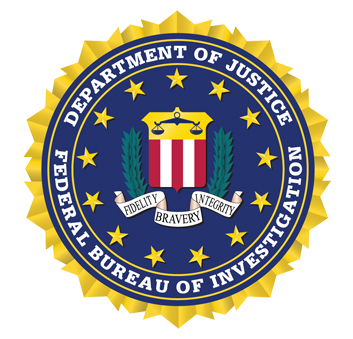

In [23]:
soup

In [24]:
#No puedo scrapear el site ya que parece que me han bloqueado.

####  20 latest earthquakes info (date, time, latitude, longitude and region name) by the EMSC as a pandas dataframe

In [4]:
# This is the url you will scrape in this exercise
url = 'https://www.emsc-csem.org/Earthquake/'
html = requests.get(url).text
soup = BeautifulSoup(html, 'html.parser')

In [5]:
#Una vez encontrados los elementos que buscamos accedemos al primero mediante índice para analizarlo.

eq = soup.find_all(class_='ligne1 normal')
eq

[<tr class="ligne1 normal" id="973439" onclick="go_details(event,973439);"><td class="tabev0"></td><td class="tabev0"></td><td class="tabev0"></td><td class="tabev6"><b><i style="display:none;">earthquake</i><a href="/Earthquake/earthquake.php?id=973439">2021-04-21   10:21:57.8</a></b><i class="ago" id="ago0">14min ago</i></td><td class="tabev1">43.12 </td><td class="tabev2">N  </td><td class="tabev1">0.26 </td><td class="tabev2">W  </td><td class="tabev3">10</td><td class="tabev5" id="magtyp0">ML</td><td class="tabev2">1.5</td><td class="tb_region" id="reg0"> PYRENEES</td><td class="comment updatetimeno" id="upd0" style="text-align:right;">2021-04-21 10:26</td></tr>,
 <tr class="ligne1 normal" id="973435" onclick="go_details(event,973435);"><td class="tabev0"></td><td class="tabev0"></td><td class="tabev0"></td><td class="tabev6"><b><i style="display:none;">earthquake</i><a href="/Earthquake/earthquake.php?id=973435">2021-04-21   09:57:18.0</a></b><i class="ago" id="ago2">38min ago</i

In [37]:
#Creamos listas de tablas para cada terremoto, así podremos acceder a los valores que nos interesan mediante el índice.

eq_table = eq[0].find_all('td')
eq_table

[<td class="tabev0"></td>,
 <td class="tabev0"></td>,
 <td class="tabev0"></td>,
 <td class="tabev6"><b><i style="display:none;">earthquake</i><a href="/Earthquake/earthquake.php?id=973439">2021-04-21   10:21:57.8</a></b><i class="ago" id="ago0">14min ago</i></td>,
 <td class="tabev1">43.12 </td>,
 <td class="tabev2">N  </td>,
 <td class="tabev1">0.26 </td>,
 <td class="tabev2">W  </td>,
 <td class="tabev3">10</td>,
 <td class="tabev5" id="magtyp0">ML</td>,
 <td class="tabev2">1.5</td>,
 <td class="tb_region" id="reg0"> PYRENEES</td>,
 <td class="comment updatetimeno" id="upd0" style="text-align:right;">2021-04-21 10:26</td>]

In [38]:
#Probando la función text strip de BS.

eq_table[3].text.strip()

'earthquake2021-04-21\xa0\xa0\xa010:21:57.814min ago'

In [43]:
#Sabiendo en qué tabla reside cada elemento creo un diccionario mediante regex para recoger los valores deseados.

eq_table = eq[0].find_all('td')

eq_dict = [{'date' : re.findall("\d\d\d\d-\d\d-\d\d", str(eq_table[3]))[0],
                'time' : re.findall("\d\d:\d\d:\d\d.\d", str(eq_table[3]))[0],
                'latitude' : eq_table[4].text.strip() + ' ' + eq_table[5].text.strip(),
                'longitude' : eq_table[6].text.strip() + ' ' + eq_table[7].text.strip(),
                'region' : eq_table[11].text.strip()}]
print(eq_dict)

[{'date': '2021-04-21', 'time': '10:21:57.8', 'latitude': '43.12 N', 'longitude': '0.26 W', 'region': 'PYRENEES'}]


In [56]:
#Una vez comprobado que la creación del diccionario es satisfactoria procedo a definir una función que nos devuelva un diccionario
#de cada terremoto.

def terremotos(n): #Siendo n el número de terremoto.
        eq_table = eq[n].find_all('td')
        eq_dict = [{'date' : re.findall("\d\d\d\d-\d\d-\d\d", str(eq_table[3]))[0],
                    'time' : re.findall("\d\d:\d\d:\d\d.\d", str(eq_table[3]))[0],
                    'latitude' : eq_table[4].text.strip() + ' ' + eq_table[5].text.strip(),
                    'longitude' : eq_table[6].text.strip() + ' ' + eq_table[7].text.strip(),
                    'region' : eq_table[11].text.strip()}]
        return(eq_dict)

In [57]:
#Testeando el DF antes de incorporar todos los datos:

df_terremotos = pd.DataFrame.from_dict(terremotos(0))
df_terremotos.head()

,date,time,latitude,longitude,region
0,2021-04-21,10:21:57.8,43.12 N,0.26 W,PYRENEES


In [58]:
#Todo correcto. Procedemos a poblar el DF con el intervalo de terremotos que queremos.

for i in range(1,20):
    try:
        terremoto = terremotos(i)
        df_terremotos = df_terremotos.append(terremoto, ignore_index=True)
    except:
        pass 

In [59]:
#Y finalmente tenemos el resultado:

df_terremotos.head(20)

,date,time,latitude,longitude,region
0,2021-04-21,10:21:57.8,43.12 N,0.26 W,PYRENEES
1,2021-04-21,09:57:18.0,34.12 S,72.12 W,"OFFSHORE O'HIGGINS, CHILE"
2,2021-04-21,09:44:47.0,34.02 S,72.32 W,"OFFSHORE O'HIGGINS, CHILE"
3,2021-04-21,09:40:42.7,35.14 N,95.37 W,OKLAHOMA
4,2021-04-21,09:24:31.0,34.05 S,72.32 W,"OFFSHORE O'HIGGINS, CHILE"
5,2021-04-21,09:12:41.0,34.00 S,72.27 W,"OFFSHORE O'HIGGINS, CHILE"
6,2021-04-21,08:44:41.0,34.08 S,72.24 W,"OFFSHORE O'HIGGINS, CHILE"
7,2021-04-21,08:38:03.0,35.71 N,3.28 W,STRAIT OF GIBRALTAR
8,2021-04-21,08:33:50.0,34.05 S,72.36 W,"OFFSHORE O'HIGGINS, CHILE"
9,2021-04-21,08:15:46.0,34.09 S,72.32 W,"OFFSHORE O'HIGGINS, CHILE"


#### Count number of tweets by a given Twitter account.

You will need to include a ***try/except block*** for account names not found. 
<br>***Hint:*** the program should count the number of tweets for any provided account

In [50]:
# This is the url you will scrape in this exercise 
# You will need to add the account credentials to this url
url = 'https://twitter.com/auronplay'

In [51]:
html = requests.get(url).text
soup = BeautifulSoup(html, 'html.parser')
soup

<!DOCTYPE html>

<html dir="ltr" lang="en">
<meta charset="utf-8"/>
<meta content="width=device-width,initial-scale=1,maximum-scale=1,user-scalable=0,viewport-fit=cover" name="viewport"/><link href="//abs.twimg.com" rel="preconnect"/><link href="//abs.twimg.com" rel="dns-prefetch"/><link href="//api.twitter.com" rel="preconnect"/><link href="//api.twitter.com" rel="dns-prefetch"/><link href="//pbs.twimg.com" rel="preconnect"/><link href="//pbs.twimg.com" rel="dns-prefetch"/><link href="//t.co" rel="preconnect"/><link href="//t.co" rel="dns-prefetch"/><link href="//video.twimg.com" rel="preconnect"/><link href="//video.twimg.com" rel="dns-prefetch"/><link as="script" crossorigin="anonymous" href="https://abs.twimg.com/responsive-web/client-web-legacy/polyfills.98da7185.js" nonce="NWNmOGJiZWItNTQ4Yy00YWQ1LTlmMzItNjQyMGYzZWE3MDEy" rel="preload"/><link as="script" crossorigin="anonymous" href="https://abs.twimg.com/responsive-web/client-web-legacy/vendors~main.76e22595.js" nonce="NWNmOGJiZ

In [59]:
#Intento acceder al número de tweets mediante BeautifulSoup pero no encuentra el objeto aún y especificando la clase.
#Lo he probado con varias cuentas y el problema es recurrente, por lo que paso a intentarlo mediante Selenium.

tweets_num = soup.findAll("div", {"class": "css-901oao css-bfa6kz r-9ilb82 r-1qd0xha r-n6v787 r-16dba41 r-1cwl3u0 r-bcqeeo r-qvutc0"})

tweets_num[0]

IndexError: list index out of range

In [46]:
#Importando las librerías que necesitaremos.

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time

In [48]:
#Test antes de definir la función.

cuenta = 'IbaiLlanos'
url = 'https://twitter.com/' #Definiendo la url base.
url_final = url + cuenta #Cuenta de usuario con la que haremos la prueba.
driver = webdriver.Chrome() #Driver que usaremos para este ejercicio.
time.sleep(3)
driver.get(url_final) #Get del perfil completo.
time.sleep(3)
result = driver.find_elements_by_class_name("css-901oao css-bfa6kz r-9ilb82 r-1qd0xha r-n6v787 r-16dba41 r-1cwl3u0 r-bcqeeo r-qvutc0")
print('La cuenta', cuenta, 'tiene', result[0], 'tweets.')

IndexError: list index out of range

Viendo que no puedo realizar el scraping con *BeautifulSoup* ni con *Selenium* y que otros compañeros están teniendo la misma problemática con **Twitter**, decido pasar a la siguiente sección del lab que no involucre esta web.

Como apunte, estoy usando el último web driver de Chrome (90.0.4430.24) y con el navegador actualizado.

#### Number of followers of a given twitter account

You will need to include a ***try/except block*** in case account/s name not found. 
<br>***Hint:*** the program should count the followers for any provided account

In [ ]:
# This is the url you will scrape in this exercise 
# You will need to add the account credentials to this ur
url = 'https://twitter.com/'

In [ ]:
#your code

#### List all language names and number of related articles in the order they appear in wikipedia.org

In [68]:
# This is the url you will scrape in this exercise
url = 'https://www.wikipedia.org/'

In [69]:
#Headers para evitar conflictos con el encoding, me ha costado bastante encontrar la solución al problema.

headers = {'Content-type': 'text/html;charset=utf-8','accept-charset': 'utf-8'}

In [75]:
#Pidiendo un response con los headers especificados.

response = requests.get(url, headers=headers)
html = response.content
soup = BeautifulSoup(html, 'html.parser')

In [84]:
languages = soup.findAll('div', attrs={'class':'central-featured-lang'})

#Observamos qué estructura tiene el output.

languages[0]

<div class="central-featured-lang lang1" dir="ltr" lang="en">
<a class="link-box" data-slogan="The Free Encyclopedia" href="//en.wikipedia.org/" id="js-link-box-en" title="English — Wikipedia — The Free Encyclopedia">
<strong>English</strong>
<small><bdi dir="ltr">6 284 000+</bdi> <span>articles</span></small>
</a>
</div>

In [85]:
#Viendo el output y sabiendo que algunos caracteres serán en otros diccionarios no resulta viable extraer los datos
#mediante regex, por lo que pruebo con otra solución en base a los delimitadores strong y small.

languages[0].find('strong').text

'English'

In [86]:
#Probando con el número de artículos:

languages[0].find('small').text

'6\xa0284\xa0000+ articles'

In [97]:
#Necesitaremos hacer un simple string replace para limpiar el resultado. Unicode es tu amigo.

languages[0].find('small').text.replace(u'\xa0', u'')

'6284000+ articles'

In [98]:
#Para acabar definimos un loop que nos devuelva esta información para cada lenguaje.

for i in languages:
    lang = i.find('strong').text
    art = i.find('small').text.replace(u'\xa0', u'')
    print(lang, 'has', art)

English has 6284000+ articles
Español has 1675000+ artículos
日本語 has 1264000+ 記事
Deutsch has 2565000+ Artikel
Русский has 1716000+ статей
Français has 2319000+ articles
Italiano has 1687000+ voci
中文 has 1191000+ 條目
Português has 1066000+ artigos
Polski has 1468000+ haseł


#### A list with the different kind of datasets available in data.gov.uk 

In [99]:
# This is the url you will scrape in this exercise
url = 'https://data.gov.uk/'

In [100]:
html = requests.get(url).text
soup = BeautifulSoup(html, 'html.parser')

In [107]:
#Buscando todos los datasets mediante la clase que todos comparten.

datasets = soup.findAll(class_ ='govuk-heading-s dgu-topics__heading')

In [110]:
datasets[0].text

'Business and economy'

In [113]:
#Un simple for loop para iterar a través de los datasets y obtener su nombre.

[print(i.text) for i in datasets]

Business and economy
Crime and justice
Defence
Education
Environment
Government
Government spending
Health
Mapping
Society
Towns and cities
Transport
Digital service performance
Government reference data


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [114]:
#Con una lambda function obtenemos más valores de los que queremos. Lo podemos evitar con un simple try/except.

for i in datasets:
    try:
        print(i.text)
    except:
        pass

Business and economy
Crime and justice
Defence
Education
Environment
Government
Government spending
Health
Mapping
Society
Towns and cities
Transport
Digital service performance
Government reference data


#### Top 10 languages by number of native speakers stored in a Pandas Dataframe

In [131]:
# This is the url you will scrape in this exercise
url = 'https://en.wikipedia.org/wiki/List_of_languages_by_number_of_native_speakers'

In [137]:
#your code

html = requests.get(url).text
soup = BeautifulSoup(html, 'html.parser')

In [164]:
#Buscamos los rows dentro de la tabla principal, cada row es una pequeña tabla.

tables = soup.find('table', attrs={'class':'wikitable sortable'}).find_all('tr') 

In [165]:
#Accedemos a la primera tabla (row) mediante índice para ver el orden y posición de su contenido.

language = tables[1]
language

<tr>
<td>1
</td>
<td><a href="/wiki/Mandarin_Chinese" title="Mandarin Chinese">Mandarin Chinese</a>
</td>
<td>918
</td>
<td>11.922%
</td>
<td><a href="/wiki/Sino-Tibetan_languages" title="Sino-Tibetan languages">Sino-Tibetan</a>
</td>
<td><a href="/wiki/Varieties_of_Chinese" title="Varieties of Chinese">Sinitic</a>
</td></tr>

In [171]:
#Obtenemos el lenguaje y el número de hablantes accediendo a las tablas:

language.find_all('td')[1].text.replace('\n', '')

'Mandarin Chinese'

In [172]:
language.find_all('td')[2].text.replace('\n','')

'918'

In [180]:
#Finalmente lo podemos usar en un loop que nos genere los diccionarios necesarios para nuestro DF:

for i in range(1,2):
    language = tables[i]
    dict = {'Language:': language.find_all('td')[1].text.replace('\n', ''), 'Millions of speakers:' : language.find_all('td')[2].text.replace('\n','')}
    
lang_df = pd.DataFrame([dict]) #Comprobamos que el df se genera correctamente.
lang_df.head()

,Language:,Millions of speakers:
0,Mandarin Chinese,918


In [185]:
#Populamos el DF con los valores necesarios.

for i in range(2,11):
    language = tables[i]
    dict = {'Language:': language.find_all('td')[1].text.replace('\n', ''), 'Millions of speakers:' : language.find_all('td')[2].text.replace('\n','')}
    lang_df = lang_df.append(dict, ignore_index=True)
    
lang_df.head(10)

,Language:,Millions of speakers:
0,Mandarin Chinese,918
1,Spanish,480
2,English,379
3,Hindi (sanskritised Hindustani)[9],341
4,Bengali,228
5,Portuguese,221
6,Russian,154
7,Japanese,128
8,Western Punjabi[10],92.7
9,Marathi,83.1


### BONUS QUESTIONS

,Language:,Millions of speakers:
0,Mandarin Chinese,918


#### Scrape a certain number of tweets of a given Twitter account.

In [ ]:
# This is the url you will scrape in this exercise 
# You will need to add the account credentials to this url
url = 'https://twitter.com/'

In [ ]:
# your code

#### IMDB's Top 250 data (movie name, Initial release, director name and stars) as a pandas dataframe

In [ ]:
# This is the url you will scrape in this exercise 
url = 'https://www.imdb.com/chart/top'

In [ ]:
# your code

#### Movie name, year and a brief summary of the top 10 random movies (IMDB) as a pandas dataframe.

In [ ]:
#This is the url you will scrape in this exercise
url = 'http://www.imdb.com/chart/top'

In [ ]:
#your code

#### Find the live weather report (temperature, wind speed, description and weather) of a given city.

In [ ]:
#https://openweathermap.org/current
city = city=input('Enter the city:')
url = 'http://api.openweathermap.org/data/2.5/weather?'+'q='+city+'&APPID=b35975e18dc93725acb092f7272cc6b8&units=metric'

In [ ]:
# your code

#### Book name,price and stock availability as a pandas dataframe.

In [ ]:
# This is the url you will scrape in this exercise. 
# It is a fictional bookstore created to be scraped. 
url = 'http://books.toscrape.com/'

In [ ]:
#your code